In [1]:
import sys, os
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import ttest_ind_from_stats
from scipy.spatial import distance
import random
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
K = [2, 4, 8, 16, 32]
data1 = pd.read_csv('digits-embedding.csv', header=None)

In [3]:
d2 = [2, 4, 6, 7]
d3 = [6, 7]
data2 = data1[data1[1].isin(d2)]
data3= data1[data1[1].isin(d3)]

In [4]:
def kmeans(data, K):
    N = len(data)
    label = [0 for i in range(len(data))]
    count = 0
    centroid_idx = np.random.randint(0, N, size=K)
    centroid = []
    for i in centroid_idx:
        centroid.append((data.iloc[i][2], data.iloc[i][3]))
    while True:
        update = 0
        x = [0.0 for i in range(K)]
        y = [0.0 for i in range(K)]
        label_count = [0 for i in range(K)]
        idx = 0
        for index, row in data.iterrows():
            # print index, row[2], row[3]
            coor = (row[2], row[3])
            candidate_label = []
            for c in centroid:
                candidate_label.append(distance.euclidean(coor, c))
            # Get the label of the current point
            l = candidate_label.index(min(candidate_label))
            x[l] += row[2]
            y[l] += row[3]
            label_count[l] += 1
            
            # Check if there's an update in each round
            if l != label[idx]:
                label[idx] = l
                update += 1
            
            idx += 1
                
        count += 1
        
        if count == 50 or update == 0:
            break
        
        # Update the centroid if they does not meet the stop criterion
        for i in range(len(centroid)):
            if label_count[i] > 0:
                centroid[i] = (1.0 * x[i]/label_count[i], 1.0 * y[i]/label_count[i])
        
        print count, update
    
    return label, centroid

In [5]:
def get_stat(data, centroid, label, K):
    N = len(data)
    WC_SSD = 0
    S = []
    d = data.iloc[:,2:4]
    data_matrix = np.array(d)
    count = 0
    for index, row in data.iterrows():
        # Update the WC_SSD
        WC_SSD += np.square(distance.euclidean((row[2], row[3]), centroid[label[count]]))
        # Update the SC
        idx = [i for i in range(N) if label[i] == label[count]]
        #print idx
        SC_A = np.sum(np.sqrt(np.sum(np.square(data_matrix[idx,:] - data_matrix[count,:]), axis = 1)))
        SC_B = np.sum(np.sqrt(np.sum(np.square(data_matrix - data_matrix[count,:]), axis = 1))) - SC_A
        SC_A /= len(idx) - 1
        SC_B /= N - len(idx)
        S.append((SC_B-SC_A)/max(SC_A, SC_B))
        count += 1
    SC = np.sum(S)/len(S)
    print 'WC_SSD:', '%.2f' % WC_SSD
    print 'SC:', '%.2f' % SC
    return WC_SSD, SC

In [6]:
# Initial the centroid
label_1 = {}
label_2 = {}
label_3 = {}

centroid_1 = {}
centroid_2 = {}
centroid_3 = {}

WC_SSD_1 = []
WC_SSD_2 = []
WC_SSD_3 = []

SC_1 = []
SC_2 = []
SC_3 = []

for k in K:
    print "K =", k
    np.random.seed(0)
    # Dataset 1
    label_1[k], centroid_1[k] = kmeans(data1, k)
    WC_SSD, SC = get_stat(data1, centroid_1[k], label_1[k], k)
    WC_SSD_1.append(WC_SSD)
    SC_1.append(SC)
    # Dataset 2
    np.random.seed(0)
    label_2[k], centroid_2[k] = kmeans(data2, k)
    WC_SSD, SC = get_stat(data2, centroid_2[k], label_2[k], k)
    WC_SSD_2.append(WC_SSD)
    SC_2.append(SC)
    # Dataset 3
    np.random.seed(0)
    label_3[k], centroid_3[k] = kmeans(data3, k)
    WC_SSD, SC = get_stat(data3, centroid_3[k], label_3[k], k)
    WC_SSD_3.append(WC_SSD)
    SC_3.append(SC)
    
print WC_SSD_1
print SC_1
print WC_SSD_2
print SC_2
print WC_SSD_3
print SC_3

K = 2
1 17750
2 3287
3 2163
4 1068
5 579
6 408
7 329
8 209
9 133
10 100
11 61
12 34
13 18
14 14
15 13
16 17
17 17
18 13
19 16
20 14
21 7
22 8
23 6
24 3
25 1
26 1
WC_SSD: 8983900.00
SC: 0.37
1 3929
2 65
WC_SSD: 4211155.69
SC: 0.49
1 2097
2 4
WC_SSD: 340372.42
SC: 0.82
K = 4
1 18068
2 3643
3 1271
4 1620
5 1452
6 1037
7 996
8 849
9 464
10 263
11 182
12 118
13 62
14 39
15 28
16 19
17 14
18 4
19 4
20 6
21 9
22 5
23 2
24 1
WC_SSD: 4215055.40
SC: 0.54
1 4258
2 739
3 442
4 822
5 1017
6 502
7 39
8 4
WC_SSD: 623865.31
SC: 0.78
1 3382
2 232
3 138
4 89
5 50
6 27
7 21
8 11
9 8
10 3
11 1
WC_SSD: 168176.80
SC: 0.83
K = 8
1 18707
2 4054
3 2805
4 1874
5 1467
6 1374
7 1112
8 976
9 873
10 778
11 624
12 575
13 519
14 340
15 217
16 156
17 106
18 72
19 50
20 36
21 29
22 17
23 19
24 24
25 18
26 14
27 13
28 8
29 6
30 4
31 6
32 6
33 3
34 4
35 6
36 10
37 5
38 5
39 2
40 3
41 2
42 1
43 1
WC_SSD: 1887699.96
SC: 0.67
1 7596
2 534
3 201
4 122
5 101
6 97
7 79
8 64
9 72
10 72
11 69
12 69
13 80
14 64
15 51
16 26
17 16


<Figure size 8640x5760 with 0 Axes>

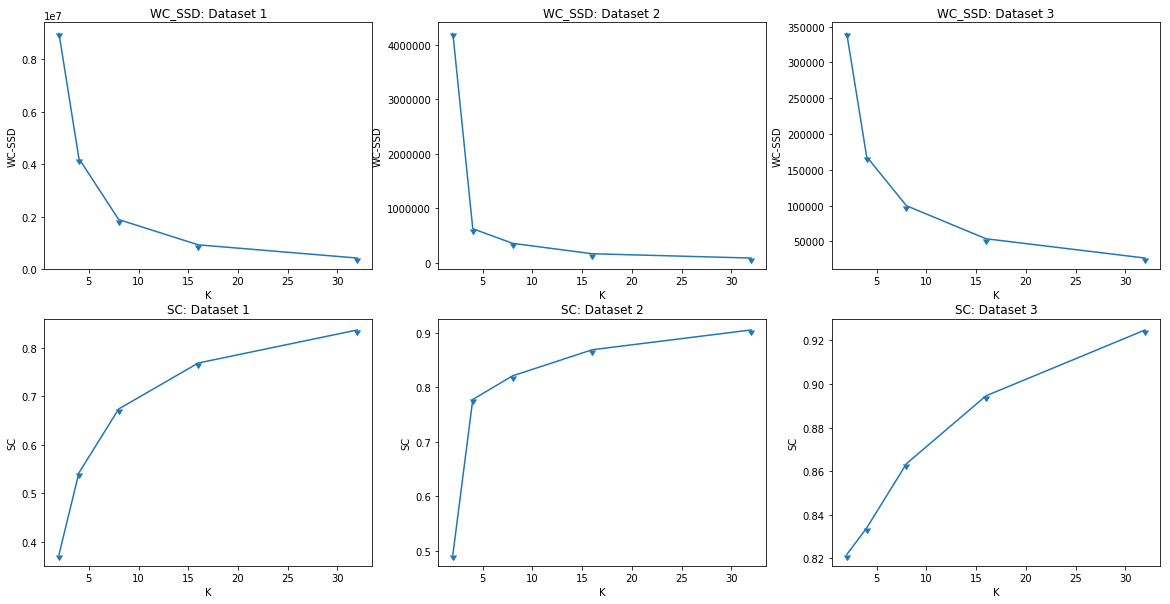

In [9]:
plt.figure(figsize=(120,80))
f, axarr = plt.subplots(2, 3, figsize=(20,10))
#WC_SSD for data1
axarr[0, 0].plot(K, WC_SSD_1, marker=matplotlib.markers.CARETDOWNBASE)
axarr[0, 0].set_title('WC_SSD: Dataset 1')
axarr[0, 0].set_xlabel('K')
axarr[0, 0].set_ylabel('WC-SSD')

#WC_SSD for data1
axarr[0, 1].plot(K, WC_SSD_2, marker=matplotlib.markers.CARETDOWNBASE)
axarr[0, 1].set_title('WC_SSD: Dataset 2')
axarr[0, 1].set_xlabel('K')
axarr[0, 1].set_ylabel('WC-SSD')

#WC_SSD for data1
axarr[0, 2].plot(K, WC_SSD_3, marker=matplotlib.markers.CARETDOWNBASE)
axarr[0, 2].set_title('WC_SSD: Dataset 3')
axarr[0, 2].set_xlabel('K')
axarr[0, 2].set_ylabel('WC-SSD')

#WC_SSD for data1
axarr[1, 0].plot(K, SC_1, marker=matplotlib.markers.CARETDOWNBASE)
axarr[1, 0].set_title('SC: Dataset 1')
axarr[1, 0].set_xlabel('K')
axarr[1, 0].set_ylabel('SC')

#WC_SSD for data1
axarr[1, 1].plot(K, SC_2, marker=matplotlib.markers.CARETDOWNBASE)
axarr[1, 1].set_title('SC: Dataset 2')
axarr[1, 1].set_xlabel('K')
axarr[1, 1].set_ylabel('SC')

#WC_SSD for data1
axarr[1, 2].plot(K, SC_3, marker=matplotlib.markers.CARETDOWNBASE)
axarr[1, 2].set_title('SC: Dataset 3')
axarr[1, 2].set_xlabel('K')
axarr[1, 2].set_ylabel('SC')

# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.savefig('./figs/2_2.png')